In [2]:
import torch
import torchvision.transforms as transforms
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import nrrd


idx = 20
nrrdPath = 'C:\\Users\\dell\\Desktop\\3DObject\\PRS-Net\\data\\MatureData\\' + str(idx) + '\\model.nrrd'
nrrdData, header = nrrd.read(filename=nrrdPath)
transform = transforms.ToTensor()
voxel = transform(nrrdData)
voxel = voxel.view(1, 32, 32, 32)

# check out the clostest point of each voxel # unfinished
nearestPointOfVoxel = torch.zeros(1, 32, 32, 32)

voxel[0,1,1,1]

tensor(0.)

In [3]:
#read the points data
pcdPath = 'C:\\Users\\dell\\Desktop\\3DObject\\PRS-Net\\data\\MatureData\\' + str(idx) + '\\model.pcd'
with open(pcdPath,mode='r') as pcdFile:
    for i in range(9):
        pcdFile.readline()
    line = pcdFile.readline()
    numPoints = line.split(sep=' ')[1]
    pcdFile.readline()
    points = list()
    for i in range(int(numPoints)):
        line = pcdFile.readline()
        xyz = line.split(' ')
        points.append([float(xyz[0]),float(xyz[1]),float(xyz[2])])
points = torch.tensor(points)
print(points)

tensor([[-0.0893, -0.0315, -0.3954],
        [-0.0669, -0.0326, -0.3747],
        [-0.0857, -0.0371, -0.3672],
        ...,
        [-0.0710, -0.0360,  0.3733],
        [-0.0693, -0.0343,  0.3888],
        [-0.0871, -0.0329,  0.3963]])


In [4]:
#try to match them
max,_ = torch.max(points,dim=0)
min,_ = torch.min(points,dim=0)
maxDiff = torch.max(max-min)
points = points - min
points = points / maxDiff * 32
print(points)
print(max,min)

tensor([[ 7.9410,  1.2290,  0.0000],
        [ 8.8493,  1.1859,  0.8361],
        [ 8.0877,  1.0032,  1.1409],
        ...,
        [ 8.6797,  1.0478, 31.0692],
        [ 8.7504,  1.1171, 31.6963],
        [ 8.0293,  1.1739, 32.0000]])
tensor([0.2931, 0.0600, 0.3963]) tensor([-0.2858, -0.0619, -0.3954])


In [18]:
voxelPos = torch.tensor([0, 0, 0])
distance = torch.norm(points - voxelPos, dim=1, keepdim=True)
_,index = torch.max(distance,dim=0)
voxelPos[0] = index
x = np.arange(0,3,1)
x/float(voxelPos[0])

array([0.        , 0.00125786, 0.00251572])

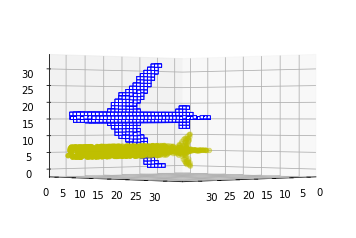

In [230]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(0,45)
ax.scatter(points[:,0], points[:,1],points[:,2],color='y')
ax.voxels(voxel[0], color='w', edgecolor="b")
plt.show()

In [231]:
with open('C:\\Users\\dell\\Desktop\\3DObject\\PRS-Net\\nrrd.txt',mode='w') as file:
    for i in range(32):
        for j in range(32):
            for k in range(32):
                file.write(str(float(voxel[0,i,j,k]))+' ')
            file.write('\n')
        file.write('\n\n\n')

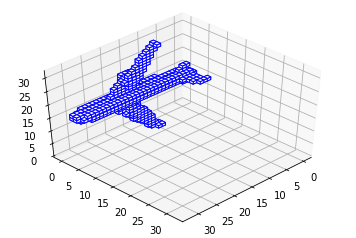

In [232]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxel[0], color='w', edgecolor="b")
ax.view_init(45,45)
plt.show()